Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
col_list = df.columns
print(col_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

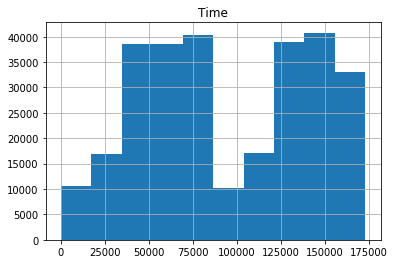

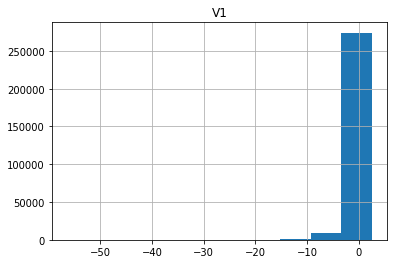

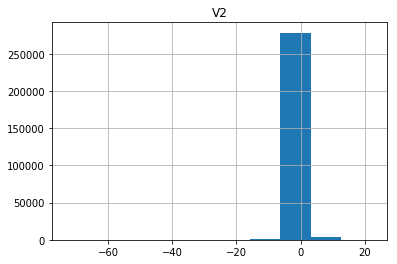

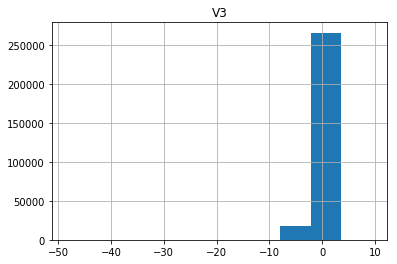

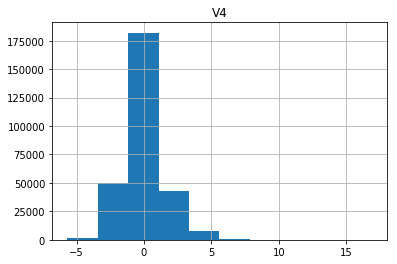

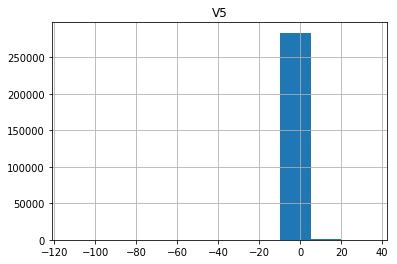

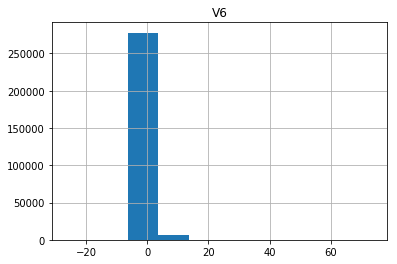

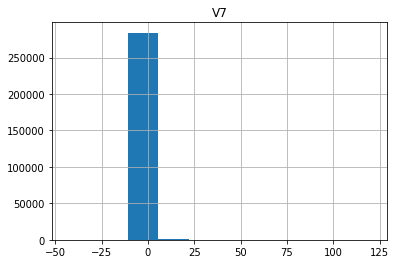

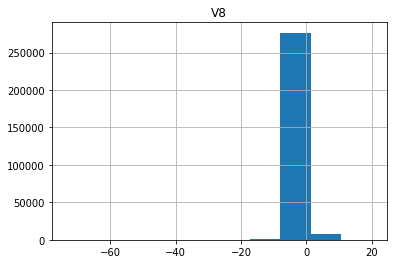

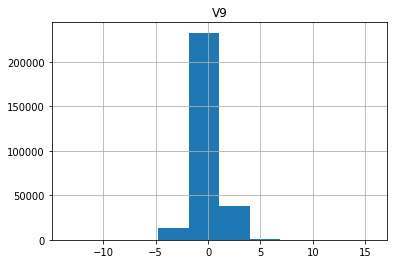

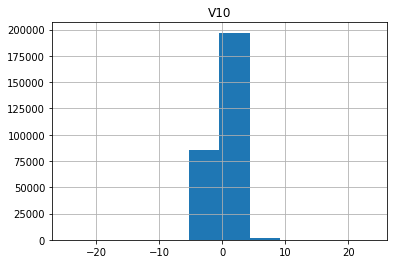

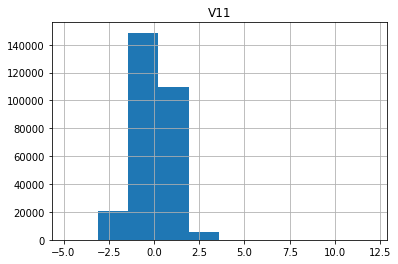

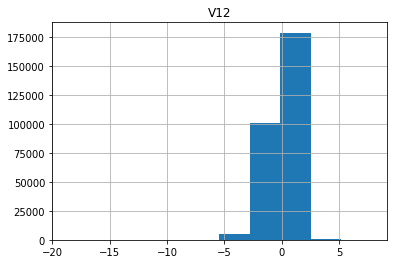

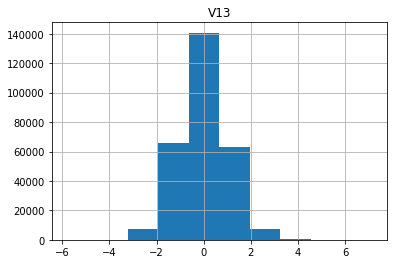

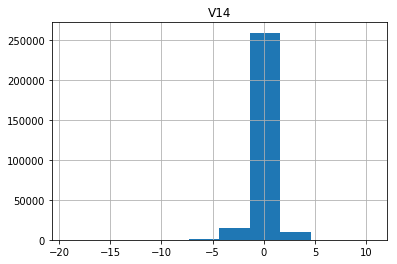

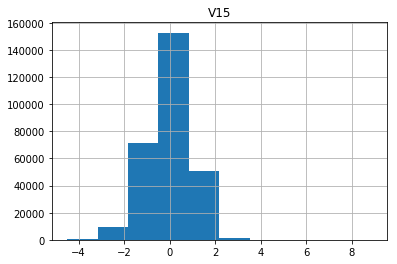

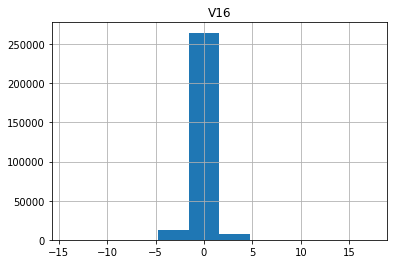

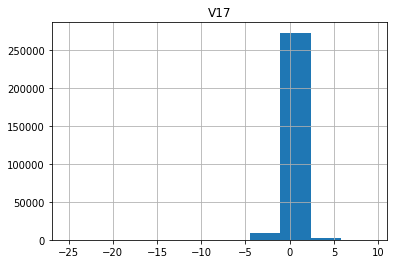

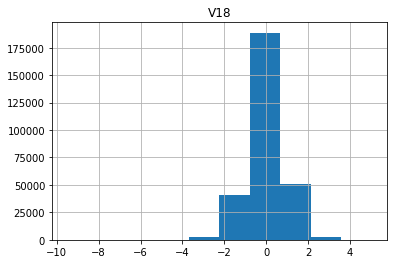

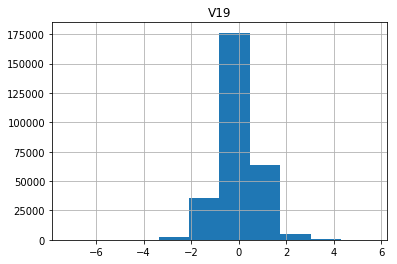

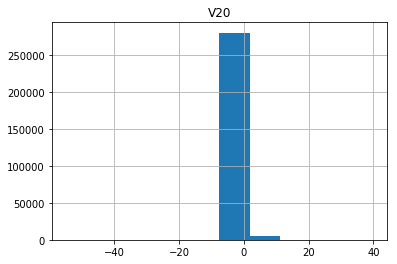

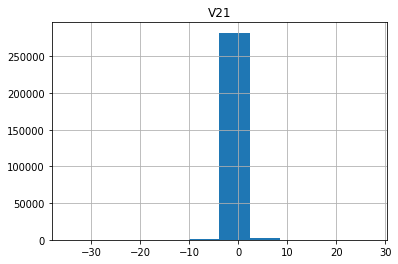

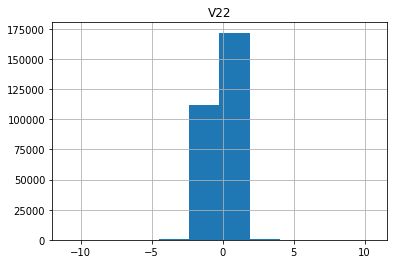

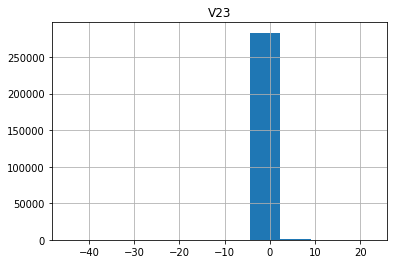

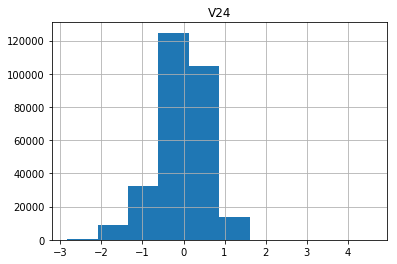

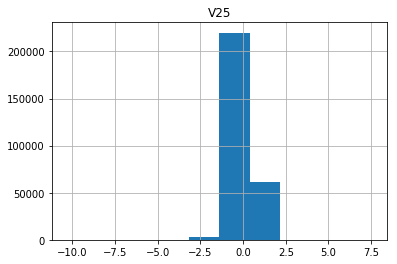

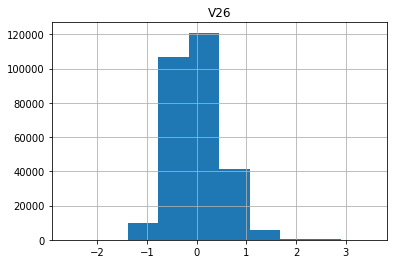

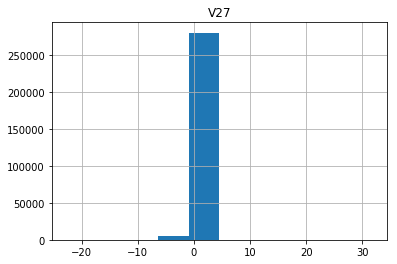

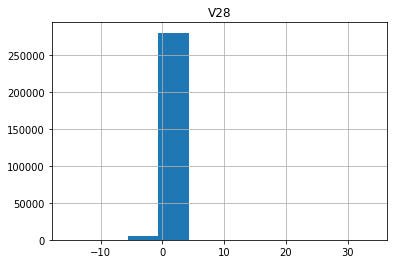

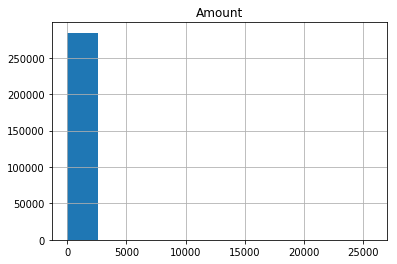

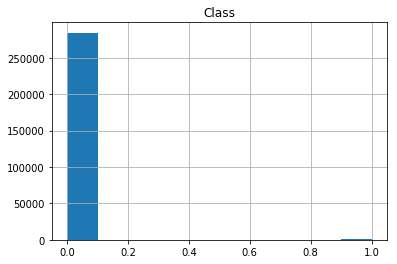

In [7]:
for col in col_list:
    df.hist(column=[col])
    plt.show()


In [34]:
sample1 = df[df.Class==0].sample(frac=.1)
sample2 = df[df.Class==1]

sample3 = pd.concat([sample1, sample2], 0)


In [35]:
sample3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
277634,167763.0,0.427860,0.254868,-1.550434,-0.958371,3.015887,3.307493,0.038040,0.822822,-0.243858,...,0.314011,0.881422,-0.142378,0.739811,0.006185,0.018409,0.021972,-0.058915,1.00,0
87232,61594.0,-2.277441,1.672201,0.935834,0.038443,-0.221164,-0.456480,0.393096,0.617306,-0.257507,...,0.108594,0.314648,-0.270222,0.048171,0.701587,-0.369509,-0.387254,-0.169112,29.34,0
207100,136517.0,-0.409369,1.219276,-0.647017,-0.373031,1.316011,-0.548199,0.980509,0.091022,-0.234362,...,0.088219,0.522340,-0.320541,0.549870,-0.065721,0.628645,0.365492,0.272661,12.31,0
142132,84586.0,-0.891071,0.338211,2.385210,-2.213749,-0.392856,-0.271931,0.395883,-0.009973,1.886841,...,-0.143258,0.109678,-0.453005,-0.063658,0.500175,-0.797909,0.111317,-0.267006,1.00,0
80925,58718.0,-0.758114,1.018286,0.999354,1.120647,-0.807101,-0.946778,0.837774,0.208887,-0.850431,...,0.296685,0.556403,0.224925,0.909480,-0.272359,-0.367898,0.007098,0.114751,121.51,0


In [36]:
df = sample3

In [37]:
df.isnull().values.any()


False

In [38]:
col_names =  ['Column Name', 'Min', 'Max']
min_max  = pd.DataFrame(columns = col_names)

In [39]:
min_max['Column Name'] = col_list
min_max['Min'] = df.min(axis=1)
min_max['Max'] = df.max(axis=1)

In [40]:
min_max.head()

,Column Name,Min,Max
0,Time,NaN,NaN
1,V1,NaN,NaN
2,V2,NaN,NaN
3,V3,-1.387024,123.5
4,V4,NaN,NaN


In [41]:
df.min()

Time       1.000000
V1       -35.557253
V2       -48.060856
V3       -31.103685
V4        -5.519697
V5       -28.363785
V6       -21.248752
V7       -43.557242
V8       -41.044261
V9       -13.434066
V10      -24.588262
V11       -4.110261
V12      -18.683715
V13       -3.844974
V14      -19.214325
V15       -4.498945
V16      -14.129855
V17      -25.162799
V18       -9.498746
V19       -3.681904
V20      -17.414483
V21      -22.797604
V22       -8.887017
V23      -19.254328
V24       -2.822684
V25       -4.781606
V26       -1.855355
V27       -9.895244
V28       -8.364853
Amount     0.000000
Class      0.000000
dtype: float64

In [42]:
df.max()

Time      172778.000000
V1             2.454930
V2            22.057729
V3             4.069865
V4            12.114672
V5            31.457046
V6            17.019934
V7            30.897666
V8            20.007208
V9             8.933028
V10           15.245686
V11           12.018913
V12            4.403899
V13            3.842704
V14            7.421944
V15            4.858398
V16            4.664236
V17            9.207059
V18            4.054462
V19            5.591971
V20           14.935000
V21           27.202839
V22            8.361985
V23           20.803344
V24            3.998294
V25            5.826159
V26            3.517346
V27           10.507884
V28           15.769636
Amount      7583.320000
Class          1.000000
dtype: float64

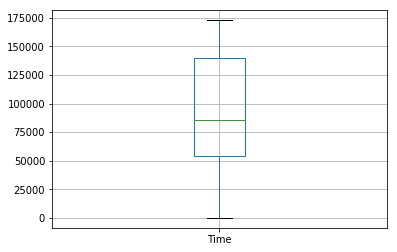

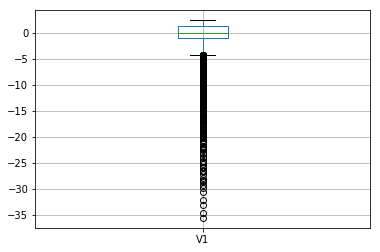

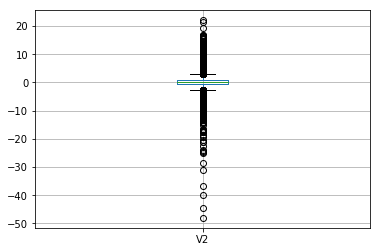

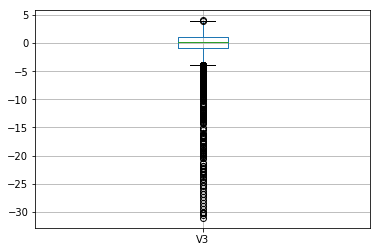

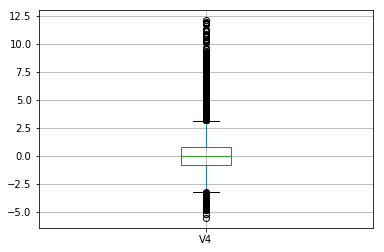

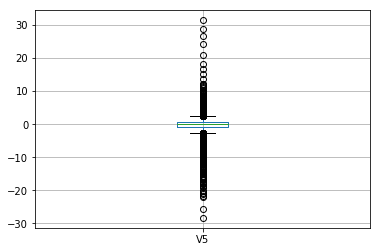

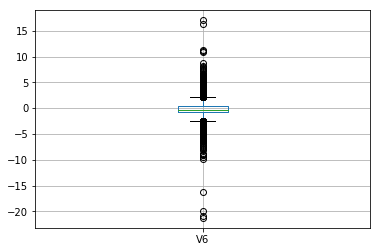

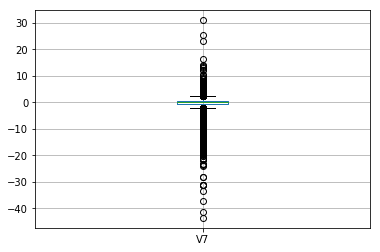

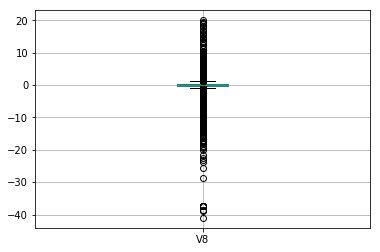

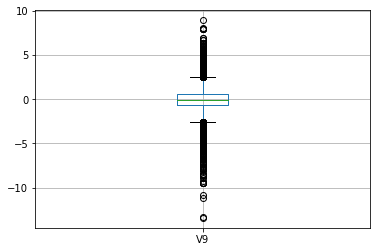

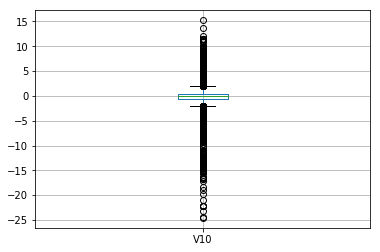

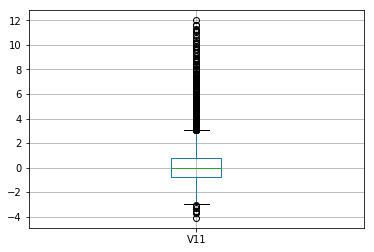

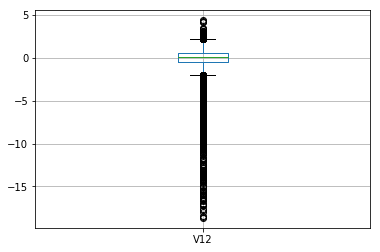

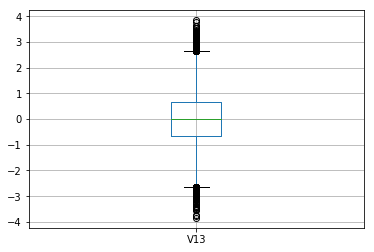

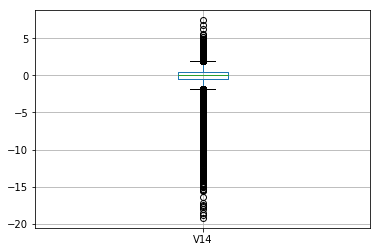

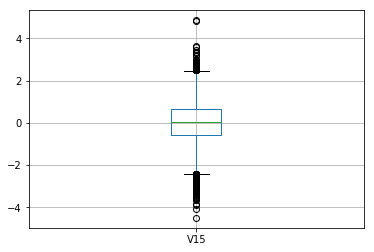

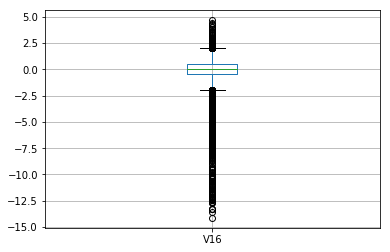

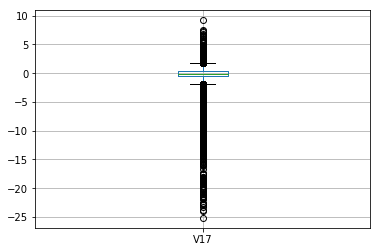

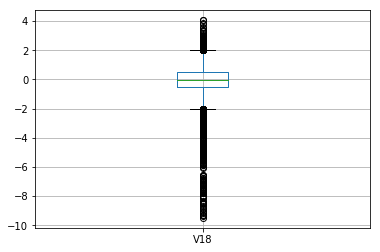

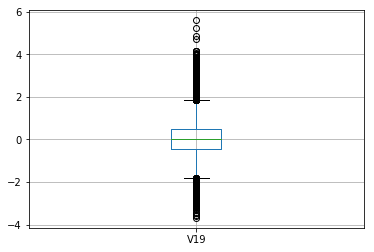

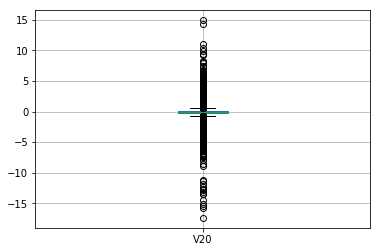

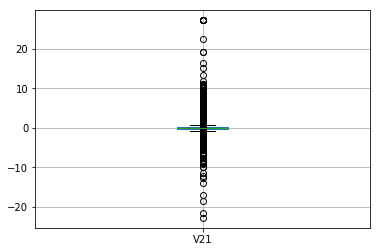

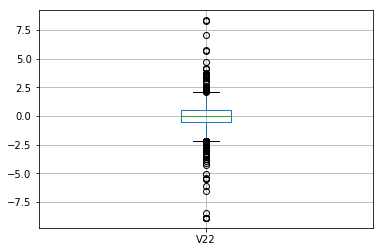

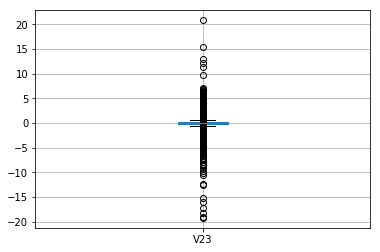

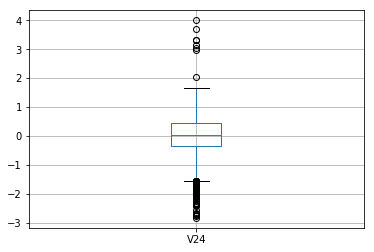

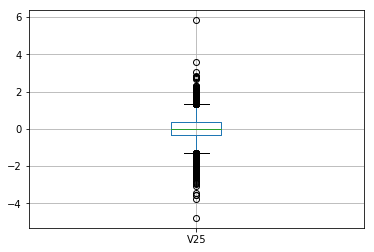

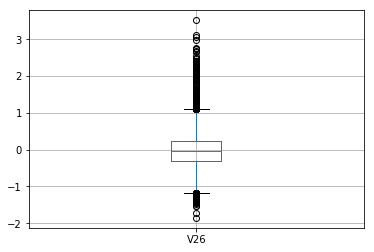

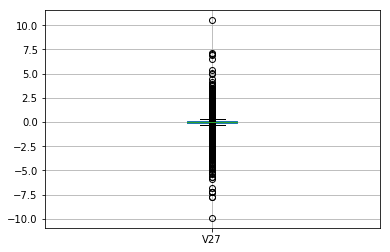

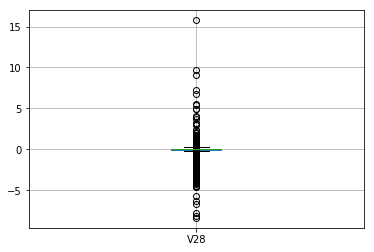

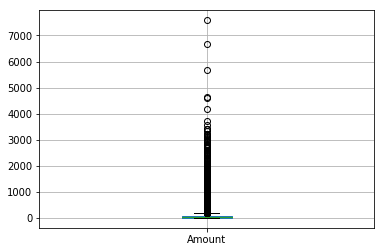

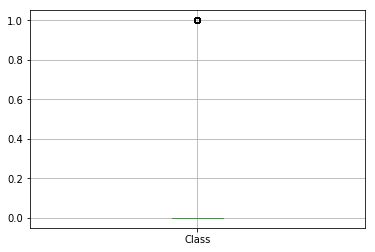

In [43]:
for col in col_list:
    df.boxplot(column=[col])
    plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.122377 -0.027369 -0.295637 -0.115943  0.186694 -0.052219   
V1      0.122377  1.000000 -0.155943  0.263562 -0.146575  0.165721  0.090606   
V2     -0.027369 -0.155943  1.000000 -0.247403  0.143278 -0.232186  0.001904   
V3     -0.295637  0.263562 -0.247403  1.000000 -0.236020  0.251294  0.095647   
V4     -0.115943 -0.146575  0.143278 -0.236020  1.000000 -0.122949 -0.075467   
V5      0.186694  0.165721 -0.232186  0.251294 -0.122949  1.000000  0.063054   
V6     -0.052219  0.090606  0.001904  0.095647 -0.075467  0.063054  1.000000   
V7      0.092710  0.338375 -0.185357  0.430712 -0.255042  0.326243  0.045464   
V8     -0.044136 -0.035164  0.000731 -0.071143  0.031434 -0.078841 -0.059276   
V9      0.010040  0.144519 -0.137677  0.210886 -0.137441  0.146075  0.040312   
V10     0.051023  0.259069 -0.236460  0.389714 -0.250465  0.268248  0.090709   
V11    -0.246400 -0.148654  0.151747 -0.

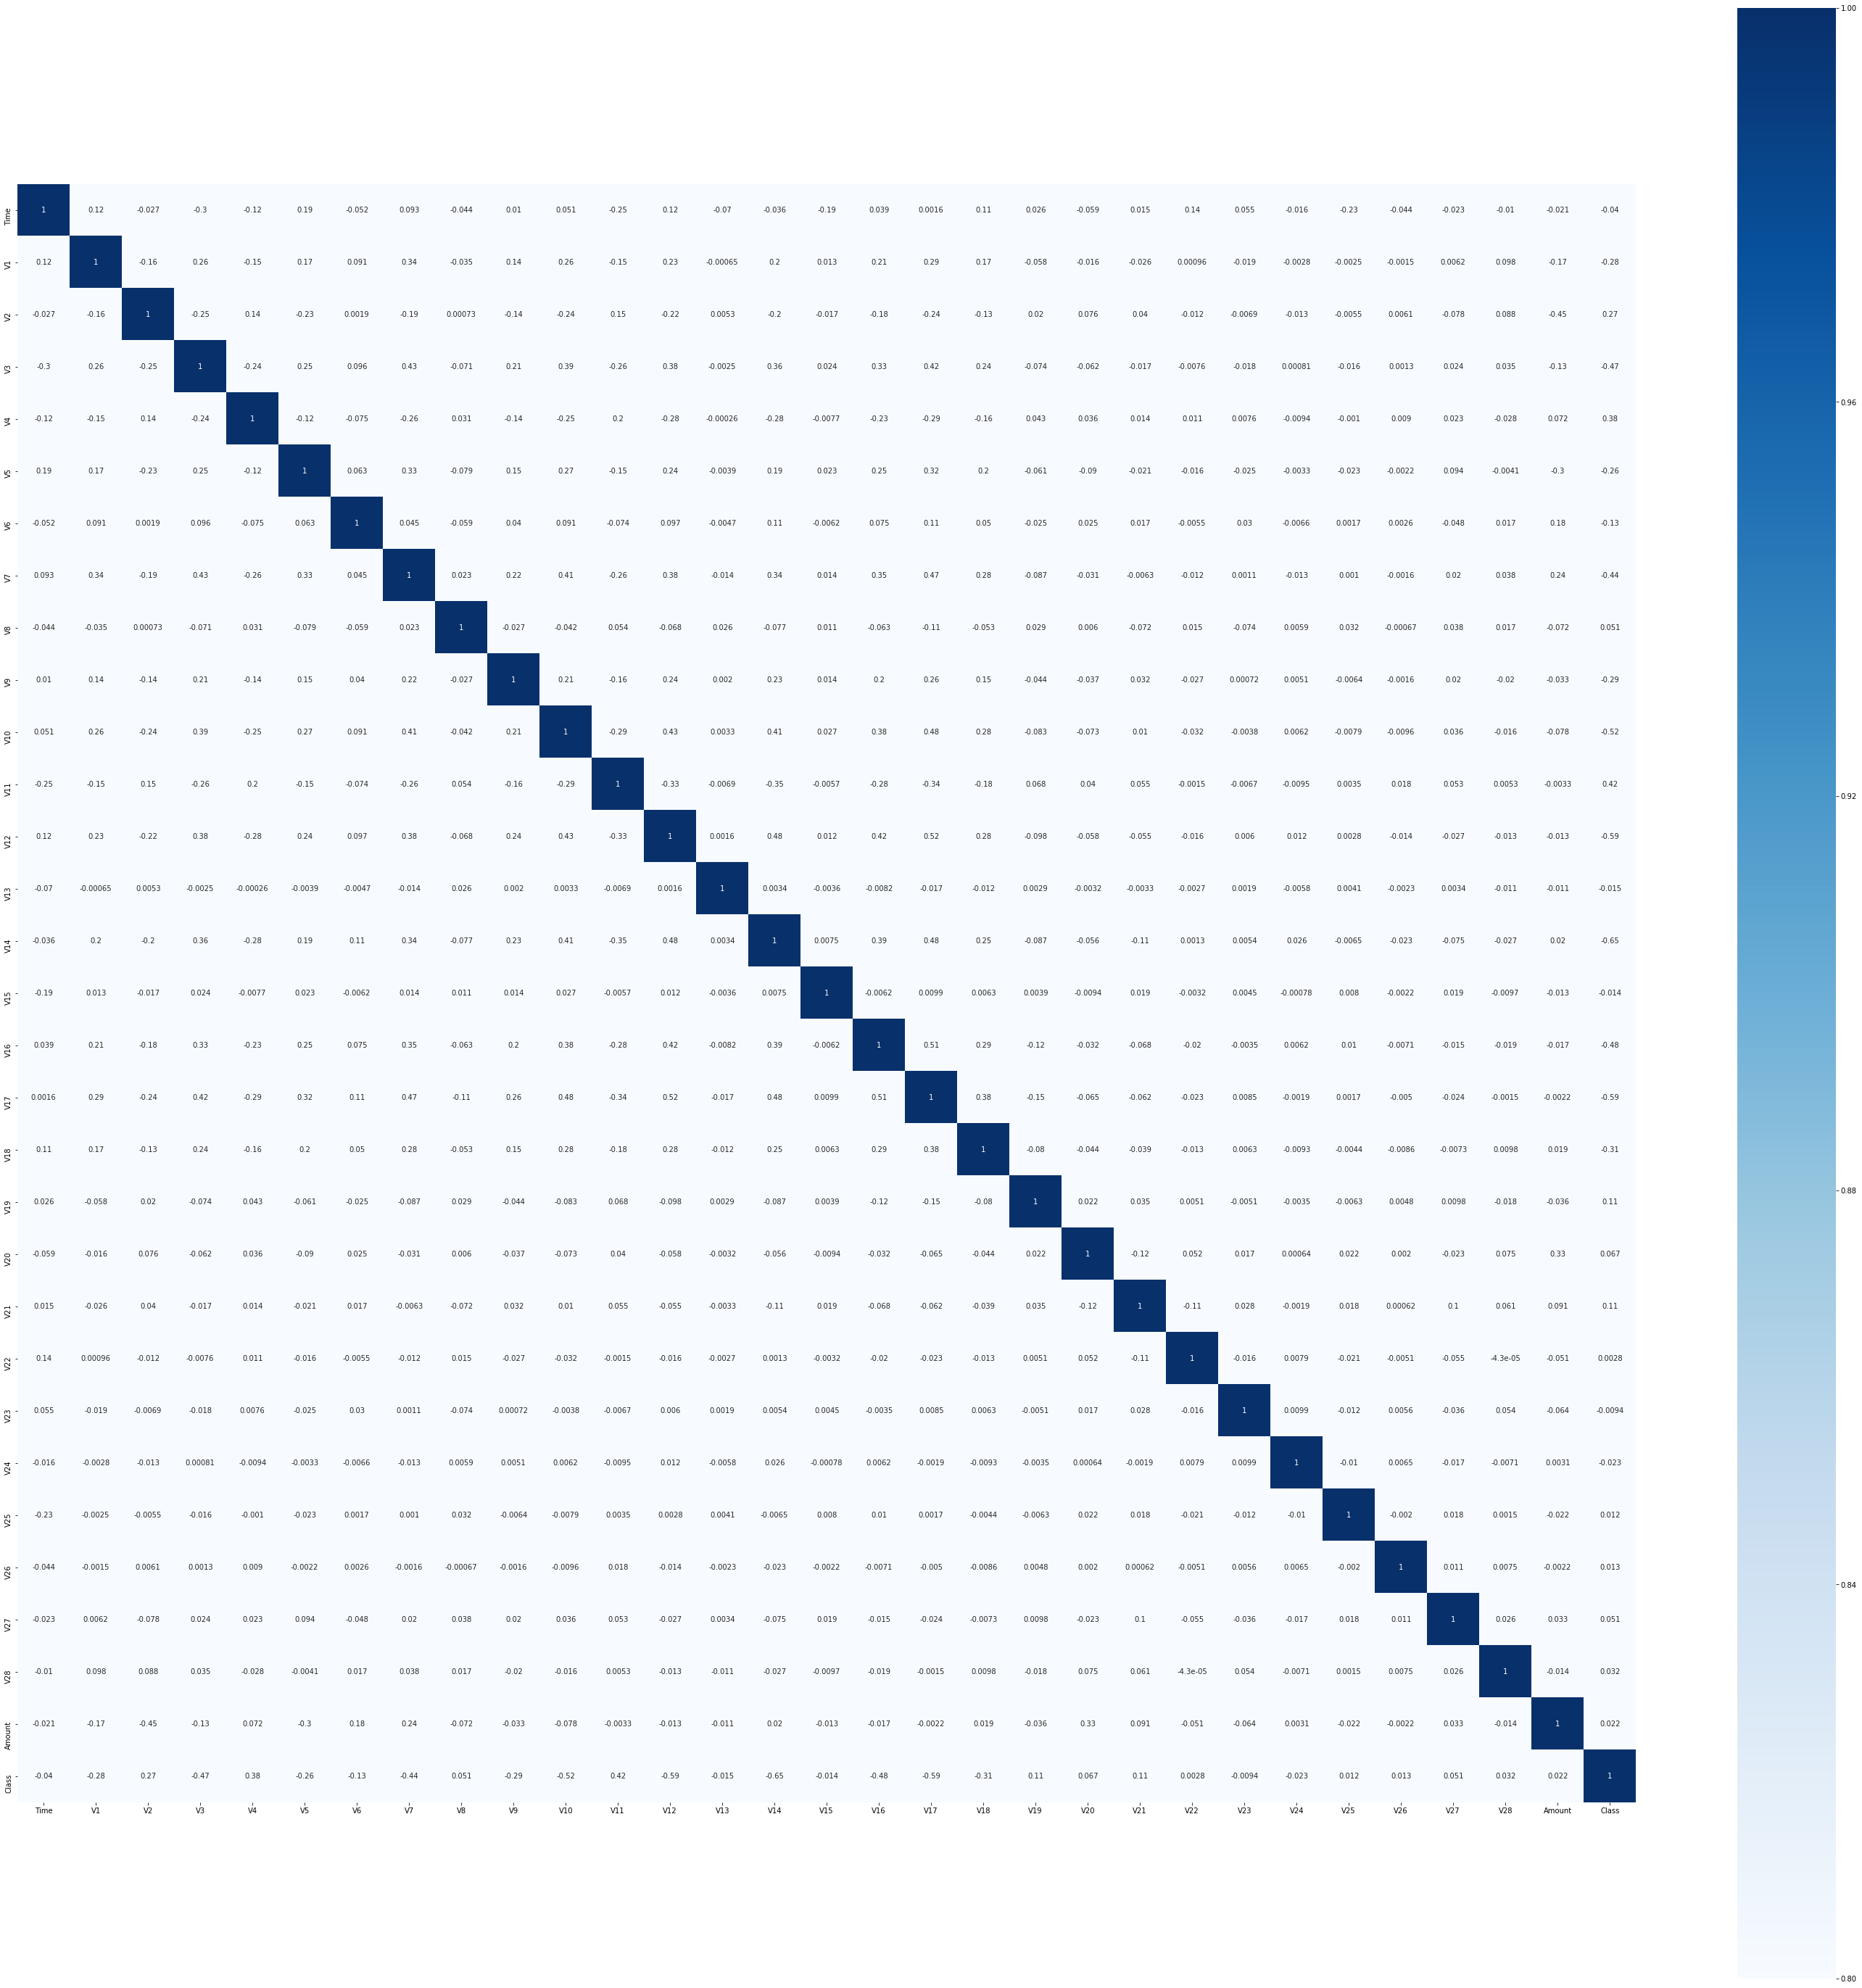

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.122377,-0.027369,-0.295637,-0.115943,0.186694,-0.052219,0.092710,-0.044136,0.010040,...,0.015179,0.137736,0.054856,-0.016122,-0.231360,-0.043549,-0.022864,-0.010196,-0.020631,-0.039577
V1,0.122377,1.000000,-0.155943,0.263562,-0.146575,0.165721,0.090606,0.338375,-0.035164,0.144519,...,-0.026234,0.000965,-0.019145,-0.002784,-0.002490,-0.001518,0.006219,0.098313,-0.172349,-0.283745
V2,-0.027369,-0.155943,1.000000,-0.247403,0.143278,-0.232186,0.001904,-0.185357,0.000731,-0.137677,...,0.040073,-0.012347,-0.006864,-0.013097,-0.005457,0.006124,-0.077557,0.087757,-0.452198,0.265337
V3,-0.295637,0.263562,-0.247403,1.000000,-0.236020,0.251294,0.095647,0.430712,-0.071143,0.210886,...,-0.016528,-0.007619,-0.018039,0.000811,-0.016184,0.001324,0.024462,0.034767,-0.132454,-0.472559
V4,-0.115943,-0.146575,0.143278,-0.236020,1.000000,-0.122949,-0.075467,-0.255042,0.031434,-0.137441,...,0.013820,0.011176,0.007572,-0.009363,-0.001022,0.009035,0.022706,-0.027745,0.071509,0.382616
V5,0.186694,0.165721,-0.232186,0.251294,-0.122949,1.000000,0.063054,0.326243,-0.078841,0.146075,...,-0.020723,-0.015789,-0.024631,-0.003267,-0.022929,-0.002196,0.093979,-0.004096,-0.298661,-0.263791
V6,-0.052219,0.090606,0.001904,0.095647,-0.075467,0.063054,1.000000,0.045464,-0.059276,0.040312,...,0.017419,-0.005463,0.030178,-0.006615,0.001722,0.002643,-0.048386,0.017026,0.180121,-0.133416
V7,0.092710,0.338375,-0.185357,0.430712,-0.255042,0.326243,0.045464,1.000000,0.023241,0.217815,...,-0.006273,-0.012313,0.001055,-0.012502,0.001030,-0.001634,0.020323,0.038086,0.243369,-0.442279
V8,-0.044136,-0.035164,0.000731,-0.071143,0.031434,-0.078841,-0.059276,0.023241,1.000000,-0.027394,...,-0.072017,0.014900,-0.074191,0.005871,0.031638,-0.000671,0.037783,0.017493,-0.072423,0.051156
V9,0.010040,0.144519,-0.137677,0.210886,-0.137441,0.146075,0.040312,0.217815,-0.027394,1.000000,...,0.031699,-0.027353,0.000716,0.005104,-0.006430,-0.001583,0.020340,-0.019520,-0.033097,-0.286306


In [44]:
corrmat = df.corr()
print(corrmat)
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(50, 50))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmin=.8, square=True, cmap="Blues", annot=True)
plt.show()
df.corr()

In [45]:
X = df.drop(['Class', 'V11', 'V18', 'V5', 'V15', 'V17', 'V24', 'V19', 'V1', 'V7', 'Amount', 'Time'], axis=1)

y = df['Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [47]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(X_train, y_train)

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
prediction = logmodel.predict(X_test)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(logmodel, X, y, cv=10)

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

array([0.9975812 , 0.99447132, 0.99896266, 0.9944675 , 0.99412172,
       0.99481328, 0.99861687, 0.99654219, 0.99688797, 0.99377593])

In [51]:
from sklearn.metrics import classification_report

In [52]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     14227\n           1       0.97      0.82      0.89       235\n\n   micro avg       1.00      1.00      1.00     14462\n   macro avg       0.98      0.91      0.94     14462\nweighted avg       1.00      1.00      1.00     14462\n'

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, prediction)

array([[14221,     6],
       [   42,   193]], dtype=int64)

In [55]:
pd.crosstab(y_test, prediction)

col_0,0,1
Class,,
0,14221,6
1,42,193


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, prediction)

0.9991994606893064

In [29]:
from sklearn.feature_selection import RFE

selector = RFE(logmodel)
selector = selector.fit(X_train, y_train)


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [30]:
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
9,V14,1
2,V4,1
5,V9,1
6,V10,1
15,V25,1
8,V13,1
10,V16,1
12,V21,1
13,V22,1
4,V8,2


In [31]:
#sns.pairplot(X)

In [32]:
#sns.pairplot(y)